In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint 
import hvplot.pandas
import requests

In [2]:
# Load the CSV file 
national_data_df = pd.read_csv("Source Data/realtor-data.zip.csv")

# Display sample data
national_data_df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0


In [3]:
#Calculate the total number of homes listed for sale
home_count = national_data_df["status"].count()
home_count


904966

In [4]:
#Calculate the average national home price
average_home_price = national_data_df["price"].mean()
average_home_price

877438.1583343924

In [5]:
#Put the csv into a dataframe
cleaned_df = national_data_df.rename(columns={
                                'status' : 'Status',
                                'bed' : 'Bed',
                                'bath' : 'Bath',
                                'acre_lot' : 'Lot Size',
                                'city' : 'City',
                                'state': 'State',
                                'zip_code': 'Zip Code',
                                'house_size': 'House Size',
                                'prev_sold_date' : 'Previous Sold Date',
                                'price': 'Price'
})


#Formatting
cleaned_df['Zip Code'] = cleaned_df['Zip Code'].map("{:.0f}".format)
cleaned_df['Price'] = cleaned_df['Price'].map("{:,.2f}".format)

cleaned_df

,Status,Bed,Bath,Lot Size,City,State,Zip Code,House Size,Previous Sold Date,Price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601,920.0,NaN,"105,000.00"
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601,1527.0,NaN,"80,000.00"
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795,748.0,NaN,"67,000.00"
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731,1800.0,NaN,"145,000.00"
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680,NaN,NaN,"65,000.00"
...,...,...,...,...,...,...,...,...,...,...
904961,for_sale,2.0,2.0,NaN,New York City,New York,10463,NaN,2021-08-13,"359,000.00"
904962,for_sale,2.0,2.0,NaN,Bronx,New York,10463,1200.0,NaN,"299,000.00"
904963,for_sale,NaN,1.0,NaN,Bronx,New York,10463,NaN,NaN,"120,000.00"
904964,for_sale,3.0,2.0,NaN,Bronx,New York,10463,NaN,NaN,"449,000.00"


In [6]:
#Set the index by state
states_df = cleaned_df.set_index(['State'])
states_df

,Status,Bed,Bath,Lot Size,City,Zip Code,House Size,Previous Sold Date,Price
State,,,,,,,,,
Puerto Rico,for_sale,3.0,2.0,0.12,Adjuntas,601,920.0,NaN,"105,000.00"
Puerto Rico,for_sale,4.0,2.0,0.08,Adjuntas,601,1527.0,NaN,"80,000.00"
Puerto Rico,for_sale,2.0,1.0,0.15,Juana Diaz,795,748.0,NaN,"67,000.00"
Puerto Rico,for_sale,4.0,2.0,0.10,Ponce,731,1800.0,NaN,"145,000.00"
Puerto Rico,for_sale,6.0,2.0,0.05,Mayaguez,680,NaN,NaN,"65,000.00"
...,...,...,...,...,...,...,...,...,...
New York,for_sale,2.0,2.0,NaN,New York City,10463,NaN,2021-08-13,"359,000.00"
New York,for_sale,2.0,2.0,NaN,Bronx,10463,1200.0,NaN,"299,000.00"
New York,for_sale,NaN,1.0,NaN,Bronx,10463,NaN,NaN,"120,000.00"


In [7]:
states_grouped_df = states_df.groupby(['State'])["Price"].describe()
states_grouped_df

,count,unique,top,freq
State,,,,
Connecticut,89778,2020,"249,900.00",1590
Delaware,2135,574,"249,900.00",33
Georgia,50,5,"531,625.00",12
Maine,36650,996,"225,000.00",513
Massachusetts,175248,1827,"799,000.00",1578
New Hampshire,51394,966,"425,000.00",486
New Jersey,231958,3463,"425,000.00",2785
New York,197215,3126,"799,000.00",2094
Pennsylvania,17148,1609,"250,000.00",210


In [14]:
#states_avg_focus = states_grouped_df(["State"])
                                     #!= "Georgia", "South Carolina", "Tennesse", "Virginia", "West Virginia", or "Wyoming")
#states_avg_focus

In [15]:
#states_df['Price'] = pd.to_numeric(states_df['Price']).astype('Int64')
states_avg_df = national_data_df.groupby(['state'])["price"].mean()
#states_avg_df['price'] = states_avg_df['price'].map("{:,.2f}".format)
states_avg_df

state
Connecticut       4.541395e+05
Delaware          3.452066e+05
Georgia           4.927036e+05
Maine             4.200100e+05
Massachusetts     9.757505e+05
New Hampshire     4.807679e+05
New Jersey        6.007043e+05
New York          1.753840e+06
Pennsylvania      4.245694e+05
Puerto Rico       4.371370e+05
Rhode Island      5.002155e+05
South Carolina    1.895000e+04
Tennessee         3.490000e+04
Vermont           4.572101e+05
Virgin Islands    7.951458e+05
Virginia          3.620645e+05
West Virginia     6.250000e+04
Wyoming           5.350000e+05
Name: price, dtype: float64

In [47]:
national_focused = national_data_df.loc[(national_data_df["state"] != "Georgia") & (national_data_df["state"] != "South Carolina") & (national_data_df["state"] != "Tennessee") & (national_data_df["state"] != "Virginia") & (national_data_df["state"] != "West Virginia") & (national_data_df["state"] != "Wyoming") & (national_data_df["state"] != "Puerto Rico") & (national_data_df["state"] != "Virgin Islands")] 
national_focused

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
24231,for_sale,2.0,1.0,0.34,Agawam,Massachusetts,1001.0,676.0,NaN,180000.0
24232,for_sale,NaN,NaN,3.41,Agawam,Massachusetts,1001.0,NaN,NaN,25000.0
24233,for_sale,2.0,2.0,NaN,Agawam,Massachusetts,1001.0,892.0,2019-04-30,169900.0
24234,for_sale,2.0,2.0,NaN,Agawam,Massachusetts,1001.0,1428.0,NaN,242000.0
24235,for_sale,2.0,2.0,NaN,Agawam,Massachusetts,1001.0,1659.0,NaN,299950.0
...,...,...,...,...,...,...,...,...,...,...
904961,for_sale,2.0,2.0,NaN,New York City,New York,10463.0,NaN,2021-08-13,359000.0
904962,for_sale,2.0,2.0,NaN,Bronx,New York,10463.0,1200.0,NaN,299000.0
904963,for_sale,NaN,1.0,NaN,Bronx,New York,10463.0,NaN,NaN,120000.0
904964,for_sale,3.0,2.0,NaN,Bronx,New York,10463.0,NaN,NaN,449000.0


In [48]:
#states_df['Price'] = pd.to_numeric(states_df['Price']).astype('Int64')
states_avg_df = round(national_focused.groupby(['state'])["price"].mean(), 2)
#states_avg_df['price'] = states_avg_df['price'].map("{:,.2f}".format)
states_avg_df

state
Connecticut       454139.50
Delaware          345206.59
Maine             420010.05
Massachusetts     975750.52
New Hampshire     480767.87
New Jersey        600704.27
New York         1753840.28
Pennsylvania      424569.43
Rhode Island      500215.49
Vermont           457210.15
Name: price, dtype: float64

In [49]:
states_avg_focus = states_avg_df

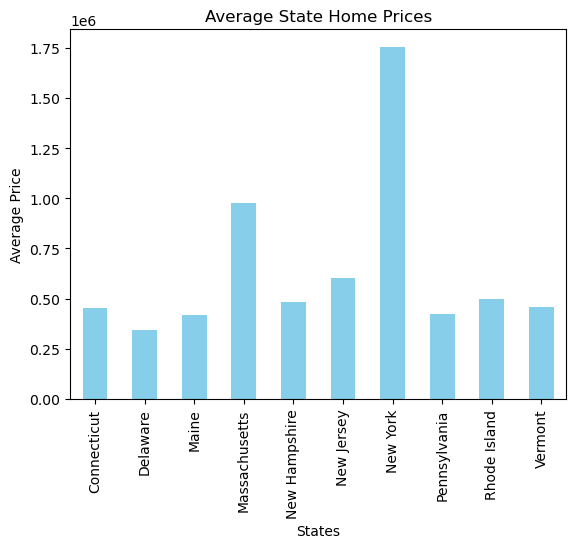

In [51]:
states_avg_df.plot(x='States', y='Price', kind='bar', color='skyblue')
plt.xlabel('States')
plt.ylabel('Average Price')
plt.title('Average State Home Prices')

plt.savefig("Output_Data/2023AvgHomePrice.png")

plt.show()